# Linear Regression and Cross Validation - Discussion

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.metrics import mean_squared_error

np.random.seed(42)

In [22]:
'''
    Utilitary functions
'''

def generate_data(n_points=21, true_a=1, true_b=0, noise_std=3, x_range=(-10, 10), seed=42):
    '''
        Generates synthetic linear data with optional intercept and noise.
    '''
    X = np.linspace(x_range[0], x_range[1], n_points)
    noise = np.random.normal(0, noise_std, size=n_points)
    y = true_a * X + true_b + noise
    return X, y, true_a, true_b


def evaluate_models(X, y, cv_strategy='loocv', n_splits=10, seed=42):
    '''
        Evaluates models with and without intercept using cross-validation.
    '''
    model_ax = LinearRegression(fit_intercept=False)
    model_ax_b = LinearRegression(fit_intercept=True)

    scores_ax = []
    scores_ax_b = []

    if cv_strategy == 'loocv':
        cv = LeaveOneOut()
    elif cv_strategy == 'kfold':
        cv = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    else:
        raise ValueError("Invalid cv_strategy. Use 'loocv' or 'kfold'.")

    for train_index, test_index in cv.split(X):
        X_train, X_test = X[train_index].reshape(-1, 1), X[test_index].reshape(-1, 1)
        y_train, y_test = y[train_index], y[test_index]

        model_ax.fit(X_train, y_train)
        model_ax_b.fit(X_train, y_train)

        pred_ax = model_ax.predict(X_test)
        pred_ax_b = model_ax_b.predict(X_test)

        scores_ax.append(mean_squared_error(y_test, pred_ax))
        scores_ax_b.append(mean_squared_error(y_test, pred_ax_b))

    return np.mean(scores_ax), np.mean(scores_ax_b), model_ax, model_ax_b


def plot_models(X, y, model_ax, model_ax_b, true_a, true_b, title):
    '''
        Plots the data, true function, and both regression model fits.
    '''

    plt.figure(figsize=(7, 5))
    X_reshaped = X.reshape(-1, 1)
    X_plot = np.linspace(min(X), max(X), 100).reshape(-1, 1)

    # predictions
    y_ax = model_ax.predict(X_plot)
    y_ax_b = model_ax_b.predict(X_plot)
    y_true = true_a * X_plot + true_b

    # plot
    plt.scatter(X, y, color='red', label='Data')
    plt.plot(X_plot, y_true, 'k--', label='True Function')
    plt.plot(X_plot, y_ax, 'blue', label='Fit: y = ax')
    plt.plot(X_plot, y_ax_b, 'green', label='Fit: y = ax + b')

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


def print_comparison(exp_name, mse_ax, mse_ax_b):
    '''
        Nice print to observe results.
    '''
    print(f"\n{exp_name}")
    print("-" * len(exp_name))
    print(f"  MSE (y = ax):     {mse_ax:.4f}")
    print(f"  MSE (y = ax + b): {mse_ax_b:.4f}")
    if mse_ax < mse_ax_b:
        print("  → Model without intercept is better.")
    else:
        print("  → Model with intercept is better.")

    Experiment with permutation of different data-defining variables.


Experiment 1: y = x, noise = 1, n = 30 (LOOCV)
----------------------------------------------
  MSE (y = ax):     0.8948
  MSE (y = ax + b): 0.9560
  → Model without intercept is better.


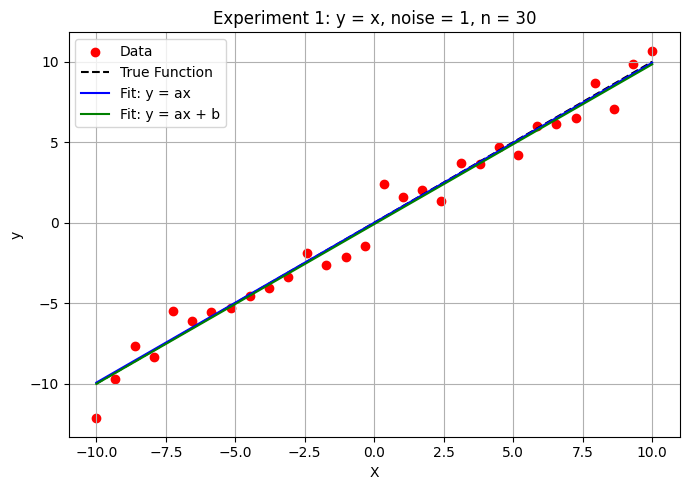


Experiment 2: y = x + 2, noise = 1, n = 30 (LOOCV)
--------------------------------------------------
  MSE (y = ax):     4.9025
  MSE (y = ax + b): 0.9541
  → Model with intercept is better.


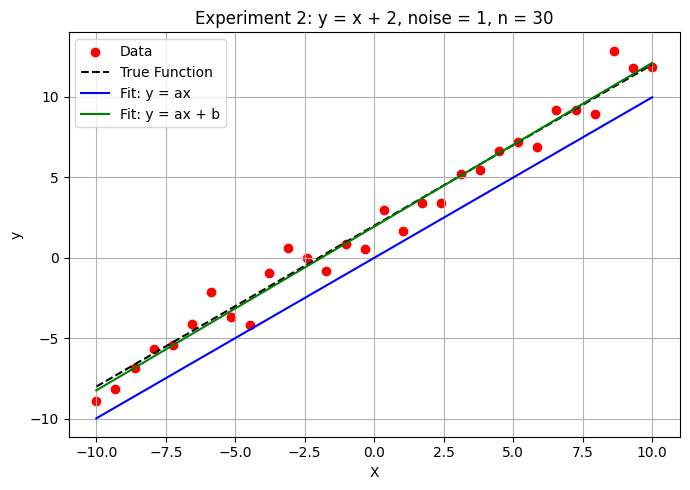


Experiment 3: y = x, noise = 3, n = 30 (LOOCV)
----------------------------------------------
  MSE (y = ax):     6.3907
  MSE (y = ax + b): 6.7818
  → Model without intercept is better.


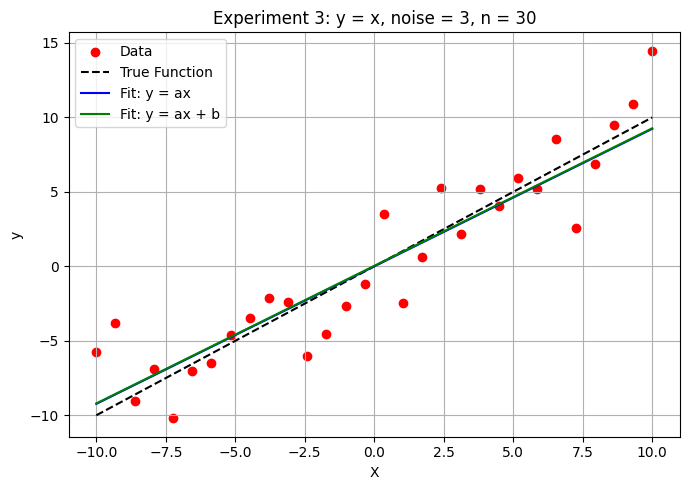


Experiment 4: y = x + 2, noise = 3, n = 30 (LOOCV)
--------------------------------------------------
  MSE (y = ax):     16.8557
  MSE (y = ax + b): 8.4782
  → Model with intercept is better.


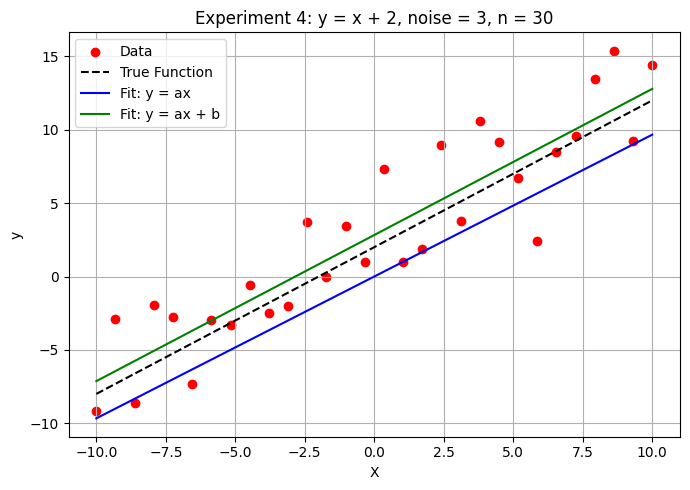


Experiment 5: y = x, noise = 5, n = 30 (LOOCV)
----------------------------------------------
  MSE (y = ax):     25.9140
  MSE (y = ax + b): 27.6629
  → Model without intercept is better.


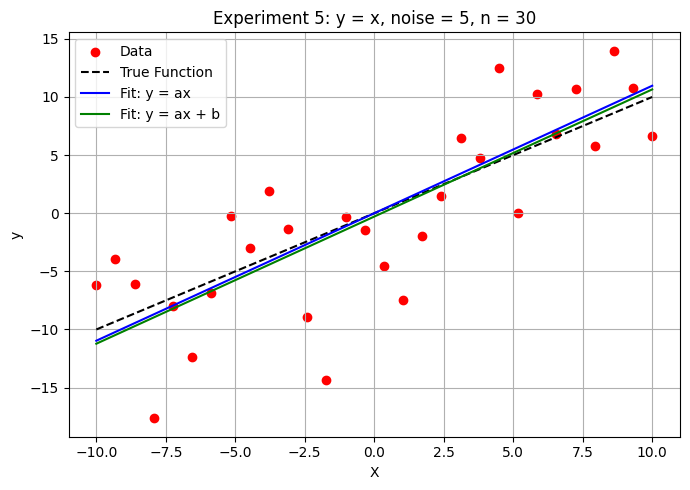


Experiment 6: y = x + 2, noise = 5, n = 30 (LOOCV)
--------------------------------------------------
  MSE (y = ax):     20.1408
  MSE (y = ax + b): 19.2661
  → Model with intercept is better.


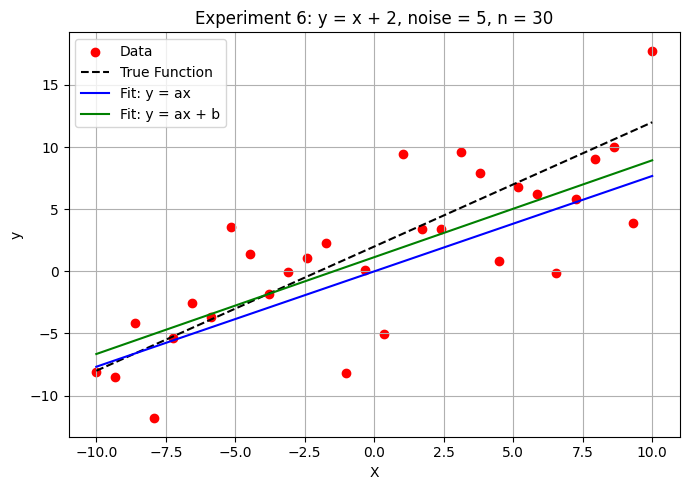


Experiment 7: y = x, noise = 8, n = 30 (LOOCV)
----------------------------------------------
  MSE (y = ax):     79.7727
  MSE (y = ax + b): 81.3475
  → Model without intercept is better.


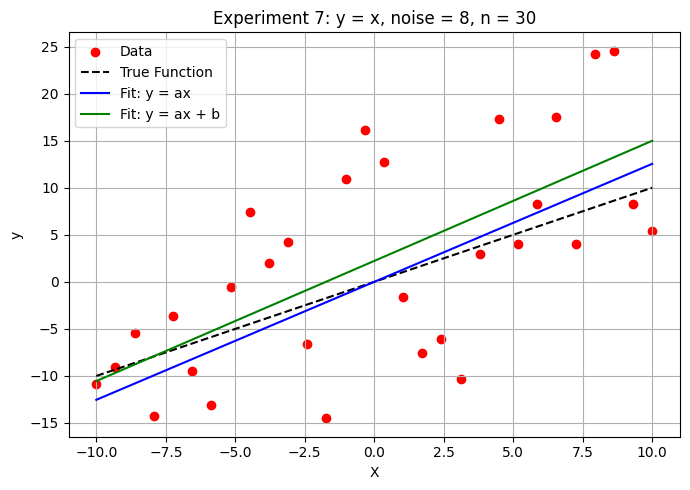


Experiment 8: y = x + 2, noise = 8, n = 30 (LOOCV)
--------------------------------------------------
  MSE (y = ax):     73.0899
  MSE (y = ax + b): 49.3500
  → Model with intercept is better.


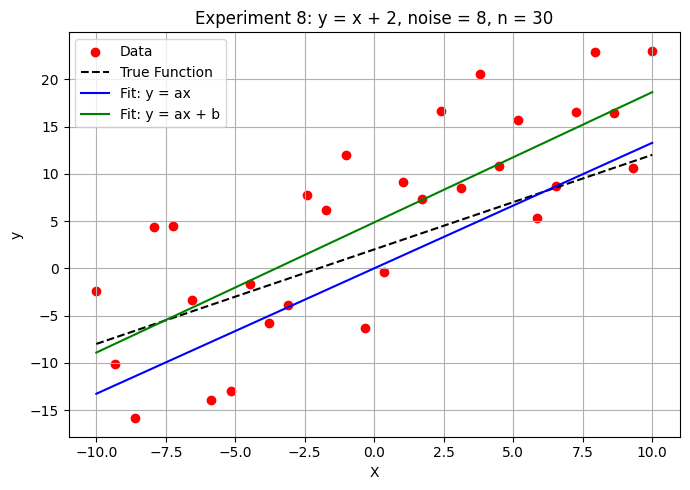


Experiment 9: y = x, noise = 1, n = 100 (KFOLD)
-----------------------------------------------
  MSE (y = ax):     0.9160
  MSE (y = ax + b): 0.9319
  → Model without intercept is better.


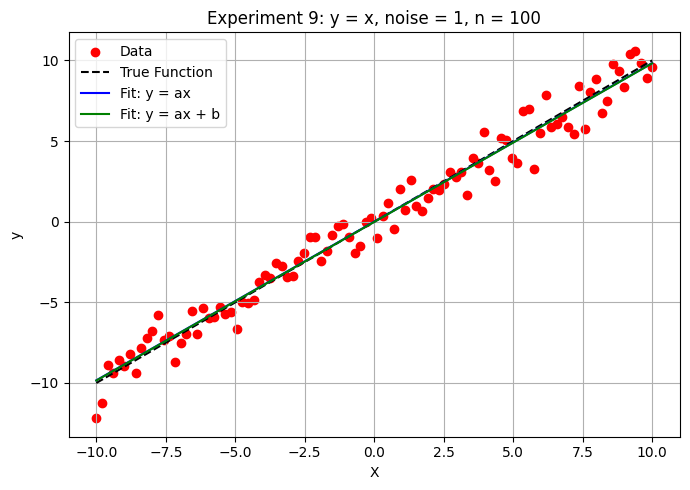


Experiment 10: y = x + 2, noise = 1, n = 100 (KFOLD)
----------------------------------------------------
  MSE (y = ax):     4.6058
  MSE (y = ax + b): 1.0922
  → Model with intercept is better.


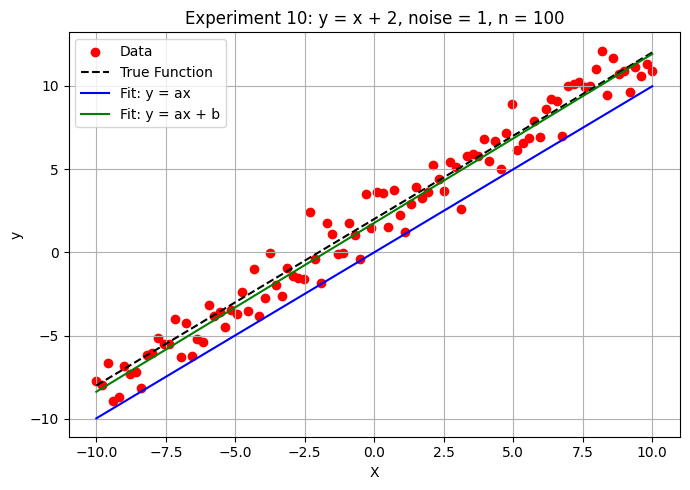


Experiment 11: y = x, noise = 3, n = 100 (KFOLD)
------------------------------------------------
  MSE (y = ax):     7.0341
  MSE (y = ax + b): 7.1732
  → Model without intercept is better.


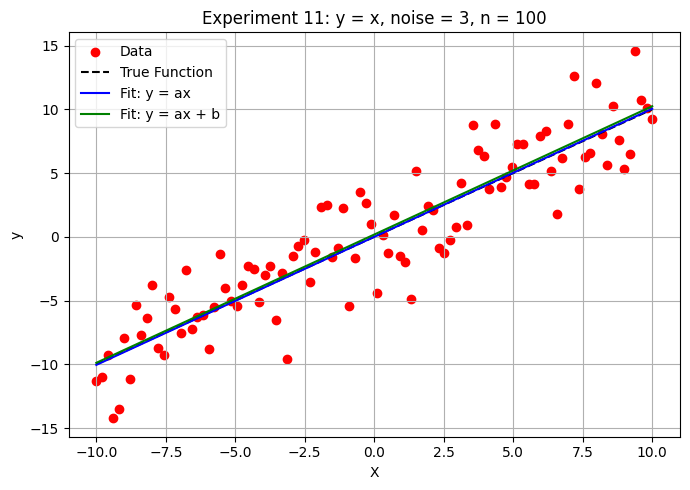


Experiment 12: y = x + 2, noise = 3, n = 100 (KFOLD)
----------------------------------------------------
  MSE (y = ax):     12.6525
  MSE (y = ax + b): 8.5358
  → Model with intercept is better.


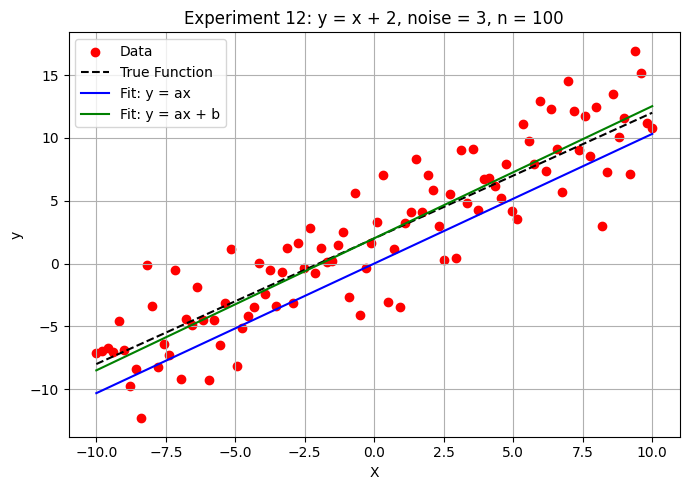


Experiment 13: y = x, noise = 5, n = 100 (KFOLD)
------------------------------------------------
  MSE (y = ax):     28.2844
  MSE (y = ax + b): 28.5829
  → Model without intercept is better.


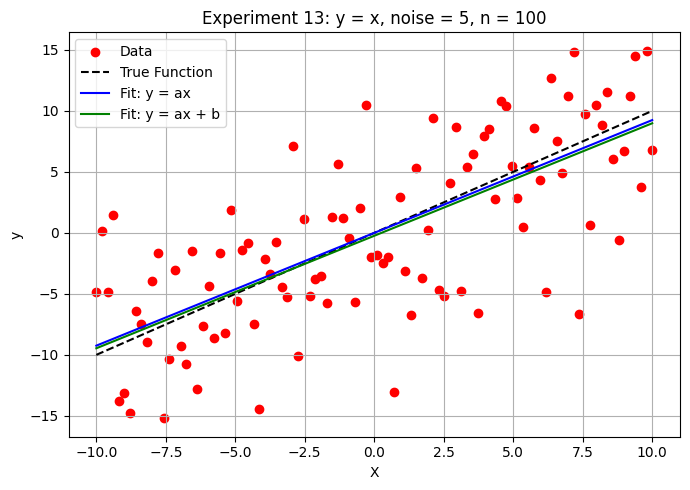


Experiment 14: y = x + 2, noise = 5, n = 100 (KFOLD)
----------------------------------------------------
  MSE (y = ax):     26.9570
  MSE (y = ax + b): 22.3329
  → Model with intercept is better.


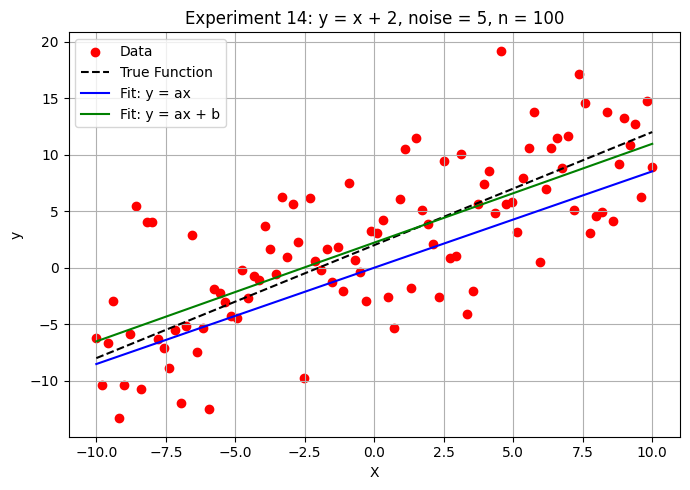


Experiment 15: y = x, noise = 8, n = 100 (KFOLD)
------------------------------------------------
  MSE (y = ax):     57.7504
  MSE (y = ax + b): 58.0634
  → Model without intercept is better.


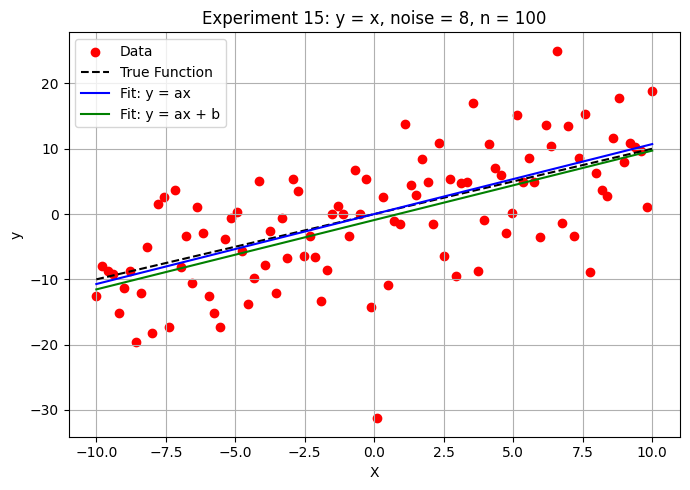


Experiment 16: y = x + 2, noise = 8, n = 100 (KFOLD)
----------------------------------------------------
  MSE (y = ax):     54.0574
  MSE (y = ax + b): 49.9574
  → Model with intercept is better.


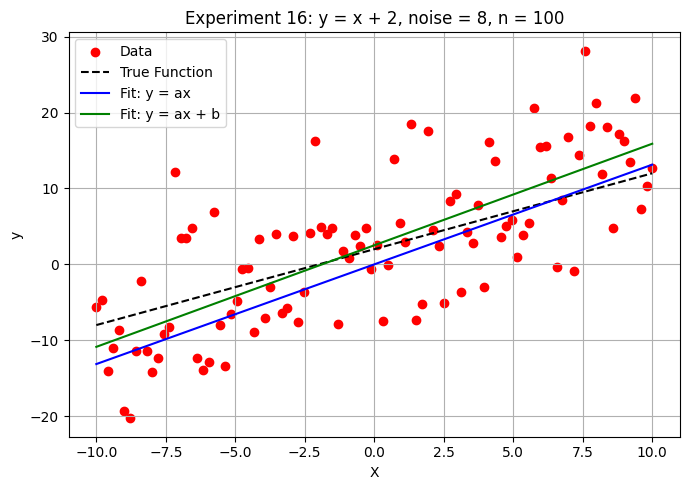


Experiment 17: y = x, noise = 1, n = 1000 (KFOLD)
-------------------------------------------------
  MSE (y = ax):     0.9472
  MSE (y = ax + b): 0.9455
  → Model with intercept is better.


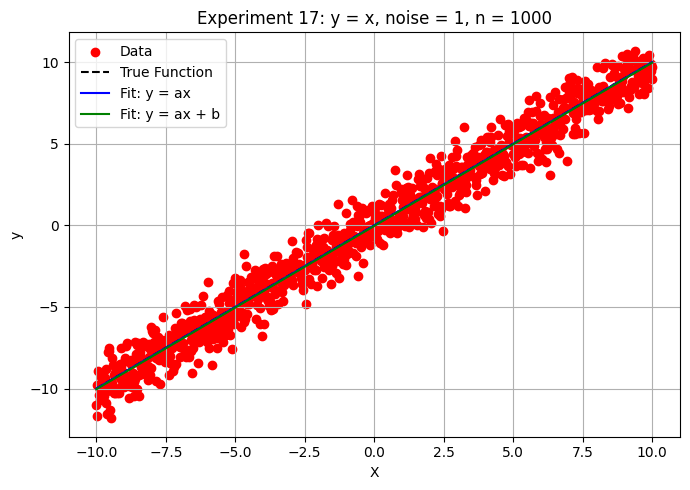


Experiment 18: y = x + 2, noise = 1, n = 1000 (KFOLD)
-----------------------------------------------------
  MSE (y = ax):     5.0019
  MSE (y = ax + b): 1.0091
  → Model with intercept is better.


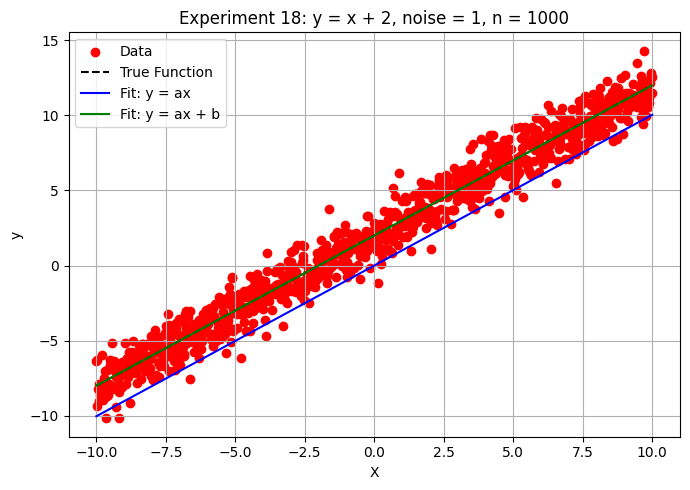


Experiment 19: y = x, noise = 3, n = 1000 (KFOLD)
-------------------------------------------------
  MSE (y = ax):     8.6204
  MSE (y = ax + b): 8.6477
  → Model without intercept is better.


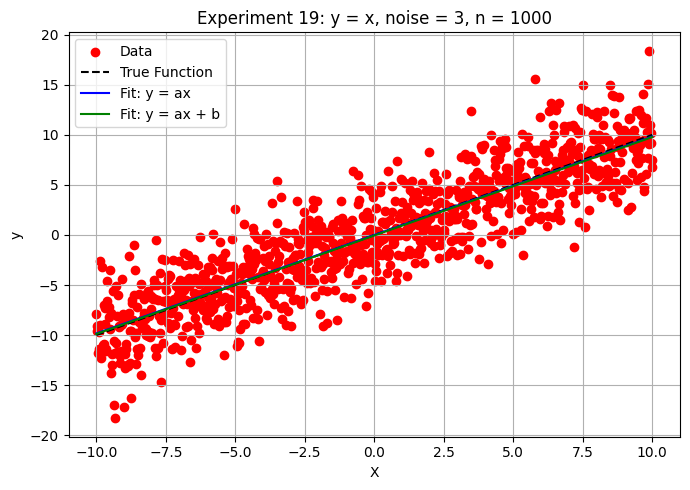


Experiment 20: y = x + 2, noise = 3, n = 1000 (KFOLD)
-----------------------------------------------------
  MSE (y = ax):     14.2331
  MSE (y = ax + b): 9.5522
  → Model with intercept is better.


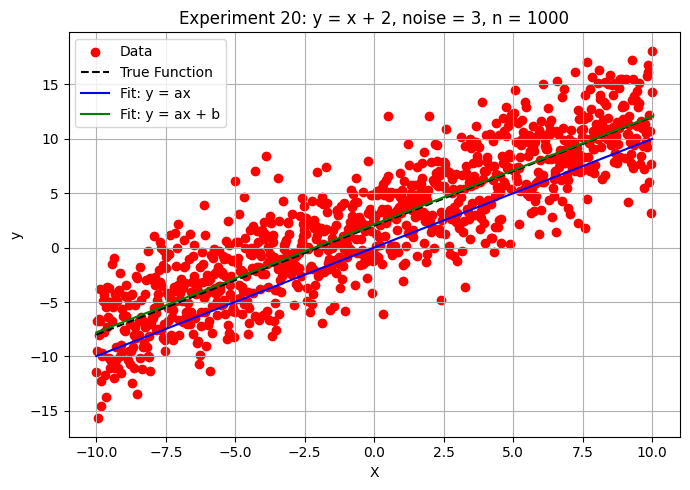


Experiment 21: y = x, noise = 5, n = 1000 (KFOLD)
-------------------------------------------------
  MSE (y = ax):     25.7958
  MSE (y = ax + b): 25.8538
  → Model without intercept is better.


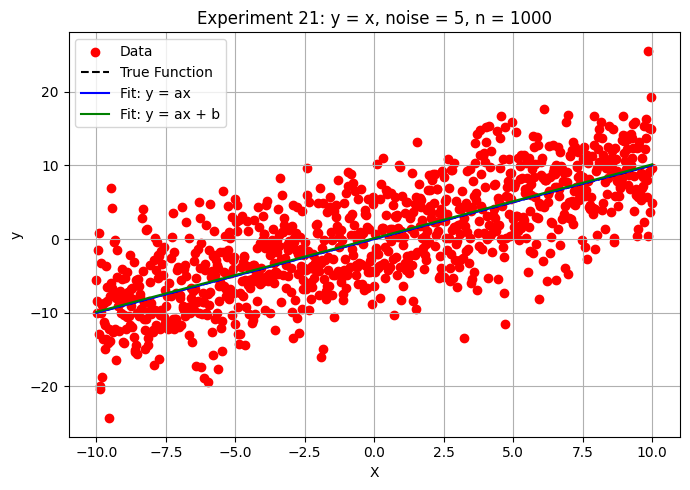


Experiment 22: y = x + 2, noise = 5, n = 1000 (KFOLD)
-----------------------------------------------------
  MSE (y = ax):     30.1406
  MSE (y = ax + b): 26.3428
  → Model with intercept is better.


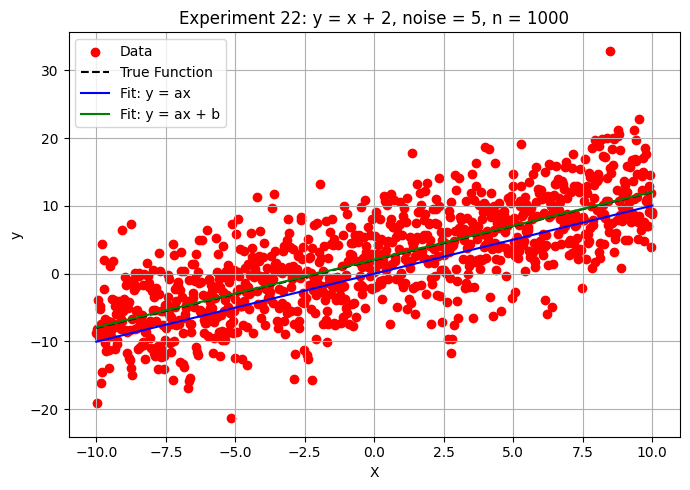


Experiment 23: y = x, noise = 8, n = 1000 (KFOLD)
-------------------------------------------------
  MSE (y = ax):     63.0650
  MSE (y = ax + b): 63.0493
  → Model with intercept is better.


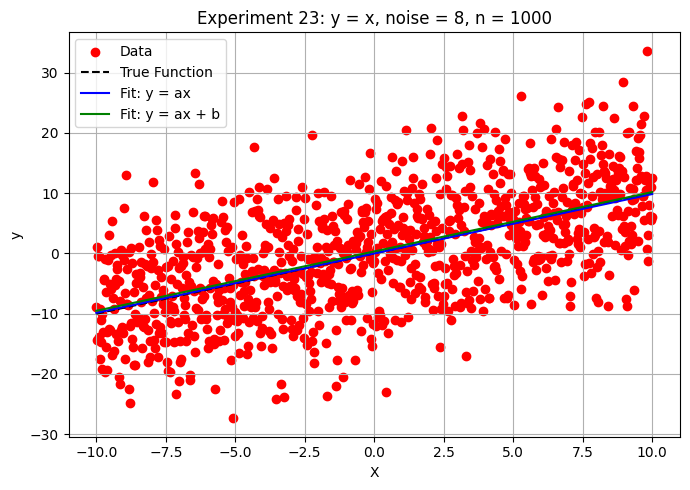


Experiment 24: y = x + 2, noise = 8, n = 1000 (KFOLD)
-----------------------------------------------------
  MSE (y = ax):     69.4485
  MSE (y = ax + b): 64.6652
  → Model with intercept is better.


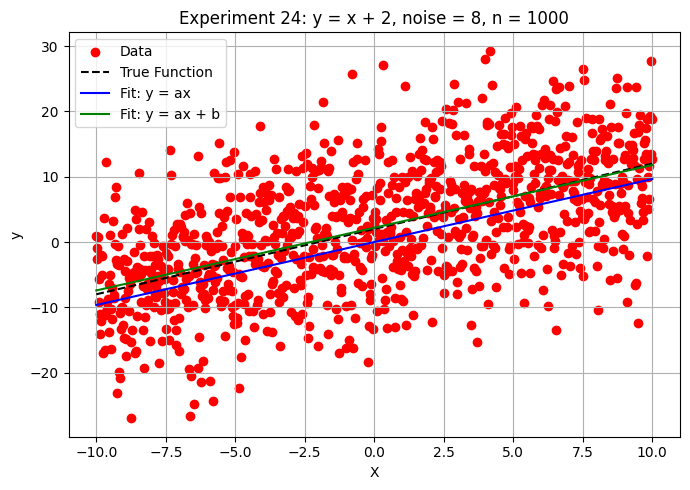


Summary of All Experiments:

ID  n     Noise  True Model     MSE y=ax    MSE y=ax+b    Better        CV
--------------------------------------------------------------------------
1   30    1      y = ax         0.8948      0.956         y = ax        loocv
2   30    1      y = ax + b     4.9025      0.9541        y = ax + b    loocv
3   30    3      y = ax         6.3907      6.7818        y = ax        loocv
4   30    3      y = ax + b     16.8557     8.4782        y = ax + b    loocv
5   30    5      y = ax         25.914      27.6629       y = ax        loocv
6   30    5      y = ax + b     20.1408     19.2661       y = ax + b    loocv
7   30    8      y = ax         79.7727     81.3475       y = ax        loocv
8   30    8      y = ax + b     73.0899     49.35         y = ax + b    loocv
9   100   1      y = ax         0.916       0.9319        y = ax        kfold
10  100   1      y = ax + b     4.6058      1.0922        y = ax + b    kfold
11  100   3      y = ax         7.0341  

In [ ]:
print("    Experiment with permutation of different data-defining variables.\n")

sample_sizes = [30, 100, 1000]
noise_levels = [1, 3, 5, 8]
true_model_types = ['no_intercept', 'with_intercept']

results = []
exp_id = 1

for n_points in sample_sizes:
    for noise in noise_levels:
        for model_type in true_model_types:
            has_intercept = model_type == 'with_intercept'
            true_a = 1
            true_b = 2 if has_intercept else 0

            exp_name = (
                f"Experiment {exp_id}: "
                f"y = x{' + 2' if has_intercept else ''}, "
                f"noise = {noise}, n = {n_points}"
            )

            # cross-validation type depends on the size of the dataset
            cv_type = 'kfold' if n_points >= 50 else 'loocv'

            # gen data
            seed = exp_id * 10
            X, y, a, b = generate_data(
                n_points=n_points, true_a=true_a, true_b=true_b,
                noise_std=noise, seed=seed
            )

            # eval both models
            mse_ax, mse_ax_b, model_ax, model_ax_b = evaluate_models(X, y, cv_strategy=cv_type)

            # determining which model is better
            better_model = 'y = ax' if mse_ax < mse_ax_b else 'y = ax + b'

            results.append({
                'Exp': exp_id,
                'n_points': n_points,
                'noise': noise,
                'true_model': 'y = ax + b' if has_intercept else 'y = ax',
                'mse_ax': round(mse_ax, 4),
                'mse_ax_b': round(mse_ax_b, 4),
                'better_model': better_model,
                'cv': cv_type
            })

            # output and plot
            print_comparison(exp_name + f" ({cv_type.upper()})", mse_ax, mse_ax_b)
            plot_models(X, y, model_ax, model_ax_b, a, b, title=exp_name)

            exp_id += 1


print("\nSummary of All Experiments:\n")
header = f"{'ID':<4}{'n':<6}{'Noise':<7}{'True Model':<15}{'MSE y=ax':<12}{'MSE y=ax+b':<14}{'Better':<14}{'CV'}"
print(header)
print("-" * len(header))
for res in results:
    print(f"{res['Exp']:<4}{res['n_points']:<6}{res['noise']:<7}"
          f"{res['true_model']:<15}{res['mse_ax']:<12}{res['mse_ax_b']:<14}"
          f"{res['better_model']:<14}{res['cv']}")
